# THE LORENZ 63 SYSTEM WITH VARYING $\rho$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation, PillowWriter
import time
import os
import tempfile

## First let's just get some code to integrate the equations and generate a simulation.

In [2]:
# Define the basic Lorenz 63 system
def lorenz63(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

## We want to visualise the attractor with various value of $\rho$

In [68]:
# Parameters for the Lorenz 63 system: these are the standard choices.
sigma = 10.0
beta = 8.0 / 3.0
# rho's are generated randomly, then sorted.
num_rho = 100
#rho_list = sorted([round(rho, 5) for rho in np.random.uniform(10, 200, num_rho).tolist()])
rho_list = list(range(11,301,1))
rho_list = [x / 10 for x in range(220, 281)]
rho_list = np.round(np.arange(24.5, 24.76, 0.001), 3).tolist()
print(rho_list)

[24.5, 24.501, 24.502, 24.503, 24.504, 24.505, 24.506, 24.507, 24.508, 24.509, 24.51, 24.511, 24.512, 24.513, 24.514, 24.515, 24.516, 24.517, 24.518, 24.519, 24.52, 24.521, 24.522, 24.523, 24.524, 24.525, 24.526, 24.527, 24.528, 24.529, 24.53, 24.531, 24.532, 24.533, 24.534, 24.535, 24.536, 24.537, 24.538, 24.539, 24.54, 24.541, 24.542, 24.543, 24.544, 24.545, 24.546, 24.547, 24.548, 24.549, 24.55, 24.551, 24.552, 24.553, 24.554, 24.555, 24.556, 24.557, 24.558, 24.559, 24.56, 24.561, 24.562, 24.563, 24.564, 24.565, 24.566, 24.567, 24.568, 24.569, 24.57, 24.571, 24.572, 24.573, 24.574, 24.575, 24.576, 24.577, 24.578, 24.579, 24.58, 24.581, 24.582, 24.583, 24.584, 24.585, 24.586, 24.587, 24.588, 24.589, 24.59, 24.591, 24.592, 24.593, 24.594, 24.595, 24.596, 24.597, 24.598, 24.599, 24.6, 24.601, 24.602, 24.603, 24.604, 24.605, 24.606, 24.607, 24.608, 24.609, 24.61, 24.611, 24.612, 24.613, 24.614, 24.615, 24.616, 24.617, 24.618, 24.619, 24.62, 24.621, 24.622, 24.623, 24.624, 24.625, 24.626

In [69]:
# Define some initial condition to start at.
initial_conditions = [-1.0, 1.0, 1.0]
xyz0=initial_conditions

# Set the timestep and the total timespan to integrate over.
T = 20
time_step = 8000
t_span = np.array([0, T])
t_eval = np.linspace(*t_span, time_step)

#rho_list = list(range(10,141,10))

# Integrate the system using solve_ivp from scipy
# Create a dummy file to write the solution
with open('dummy.txt', 'w') as f:
    for rho in rho_list:
        #print(rho)
        sol = solve_ivp(lorenz63, t_span, initial_conditions, t_eval=t_eval, args=(sigma, rho, beta))
        initial_conditions = sol.y[:, -1]
        t_span = t_span + T
        t_eval = np.linspace(*t_span, time_step)
        np.savetxt(f, (sol.y).T)

In [70]:
# Load solutions from dummy file
sols = np.loadtxt('dummy.txt')
print(sols.shape)
x = sols[:, 0]
y = sols[:, 1]
z = sols[:, 2]
# Normalise the dimensions.
xn = x/x.std()
yn = y/y.std()
zn = z/z.std()

os.remove("dummy.txt") 


(2088000, 3)


261

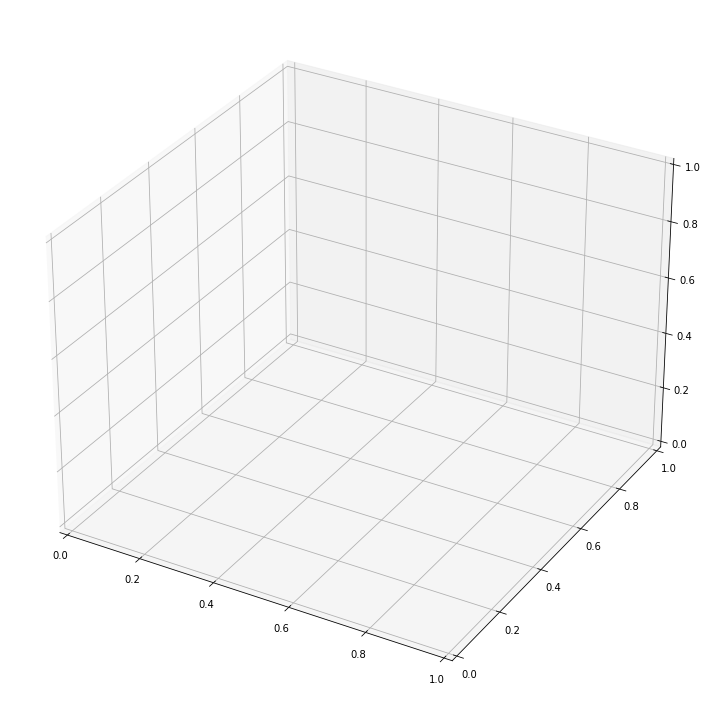

In [71]:
# Split data into blocks of block_size and create a colormap with a unique color for each block
blocks = [slice(i, i + time_step) for i in range(0, len(xn), time_step)]
num_blocks = len(blocks)
colors = plt.cm.get_cmap('Spectral', num_blocks) 
# magma, inferno, plasma, cividis, viridis, turbo, coolwarm, Spectral
block_colors = [colors(i) for i in range(num_blocks)]

# figure and plot
elev = 10
azim = -40
xlims = (-3, 3)
ylims = (-3, 3)
zlims = (0, 6)
fig = plt.figure(figsize=(10, 10));
ax = fig.add_subplot(projection='3d');
plt.tight_layout();

len(blocks)

### The code below to generate gif file since my matplotlib backend was broken.

In [72]:
# plot settings
def initialize_plot():
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_zlim(zlims)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.zaxis.set_tick_params(labelbottom=False)
    #ax.set_title(f'Lorenz `63 Integration \n initial condition={xyz0}',y=0.9, fontsize=12)
    ax.set_title(f'Lorenz `63 Integration \n initial condition={xyz0}',y=0.05, fontsize=12)
    ax.view_init(elev=elev, azim=azim)

initialize_plot()

# update the plot
def update(i):
    ax.clear()
    initialize_plot()
    block = blocks[i]
    #ax.scatter(xn[block], yn[block], zn[block], color=block_colors[i], label=f'rho={rho_list[i]}', s=0.05, alpha=1.0)
    #ax.legend(loc='lower right')
    ax.scatter(xn[block], yn[block], zn[block], color='b', label=f'rho={rho_list[i]}', s=0.1, alpha=1.0)
    #ax.legend(loc='upper right', bbox_to_anchor=(0.75, 0.1), ncol=1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.95, 0.80), labelcolor='blue')

# animation
ani = FuncAnimation(fig, update, frames=len(blocks), repeat=False)

# save the animation as a GIF
writer = PillowWriter(fps=5, metadata={'dpi': 300})
ani.save("lorenz63_integration.gif", writer=writer)

## Exercise 1.

Play around with giving different initial conditions, changing length of integration or timesteps etc. to get a feel for the behaviour.

If you haven't done so already, you can paly around similarly with the following interactive website: https://joshdorrington.github.io/L63_simulator/

Click anywhere on the attractor to initiate a trajectory starting there.